### 필수과제 1
- 1종 오류와 2종 오류에 대한 개념적인 내용 정리와
- 두 오류에 대한 그래프 비교를 통해서 개념을 함께 정리해 주세요!

가설 검정을 수행하는 경우 제 1종 오류와 제 2종 오류 등 두 가지 유형의 오류가 가능하다
이 두 오류의 위험은 역의 관계가 있으며 검정의 유의수준 및 검정력에 의해 결정된다.
따라서 위험을 정의하기 전에 어느 오류가 상황에 더 심각한 결과를 초래하는지를 확인하는 작업이 매우 중요하다.
어느 가설도 검정도 100% 확실하지 않고, 이는 검정이 확률을 기반으로 하기 때문에 항상 잘못된 결론을 내릴 가능성이 있다.

#### 1종 오류
- 1종 오류는 통계적 가설 검정에서 귀무가설이 참인데도 불구하고 귀무가설을 기각하는 오류이다.
- 정리하면 실제로는 참인데 통계적으로 참이 아니라고 잘못 결론 내리는 오류이다.
- 1종 오류의 확률을 유의 수준(significance level) 또는 알파(alpha)라고 하며 보통 유의 수준은 0.05 또는 0.01로 설정하고, 이는 5% 또는 1%의 오류를 허용한다는 의미인 것이다.
- α가 0.05이면 귀무가설을 잘못 기각할 가능성이 5%임을 인정하는 것이다.
- 이 위험을 낮추기 위해서 더 낮은 α 값을 사용해야 하며, 낮은 값을 사용하면 실제로 존재하는 실제 차이를 탐지할 가능성이 더 적어지게된다. 
- 1종 오류의 확률은 유의 수준에 의해 결정되며, 유의 수준이 작을수록 1종 오류가 발생할 확률은 줄어든다.
- 예를 들면, 신약의 효과를 검정하는 경우, 귀무가설은 "신약은 효과가 없다"이고, 1종 오류는 "신약은 효과가 없지 않다(즉, 효과가 있다)"고 잘못 결론 내리는 것이다.

#### 2종 오류
- 2종 오류는 통계적 가설 검정에서 귀무가설이 거짓인데도 불구하고 귀무가설을 채택하는 오류이다.
- 즉, 실제로는 거짓인데 통계적으로 거짓이 아니라고 잘못 결론 내리는 오류이다.
- 2종 오류의 확률을 베타(beta)라고 하며, 2종 오류의 확률은 검정력(power)에 영향을 받는다. 검정력은 효과의 크기, 표본 크기 등에 의해 결정되며 1 - 검정력으로 계산할 수 있고, 검정력은 거짓인 대립가설을 올바르게 채택할 확률을 의미한다.
- 검정력을 충분하게 설정함으로써 제2종 오류를 범할 위험을 줄일 수 있다.
- 실제 존재하는 차이를 탐지할 수 있을 정도로 표본 크기를 크게 만들어야하며, 이는 거짓인 귀무가설을 기각할 확률은 1–β와 같게 되고 이 값이 검정의 검정력이라 할 수 있다.
- 예를 들어, 신약의 효과를 검정하는 경우, 대립가설은 "신약은 효과가 있다"이고, 2종 오류는 "신약은 효과가 없다고 하지 않는다(즉, 효과가 있다고 하지 않는다)"고 잘못 결론 내리는 것이다.

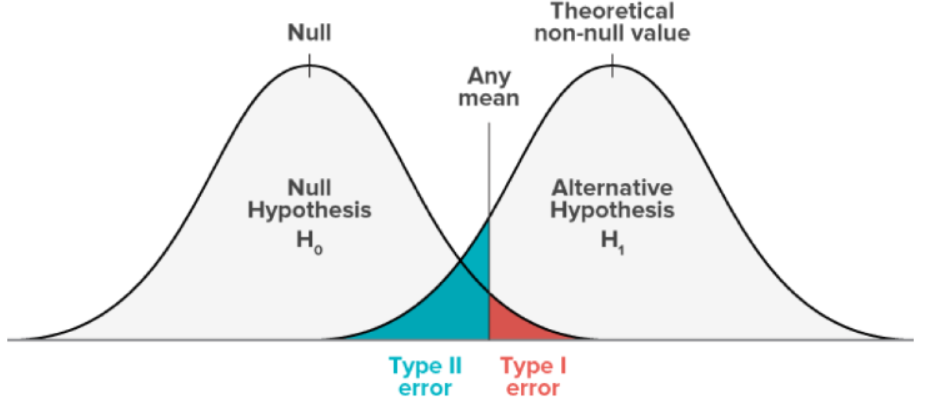

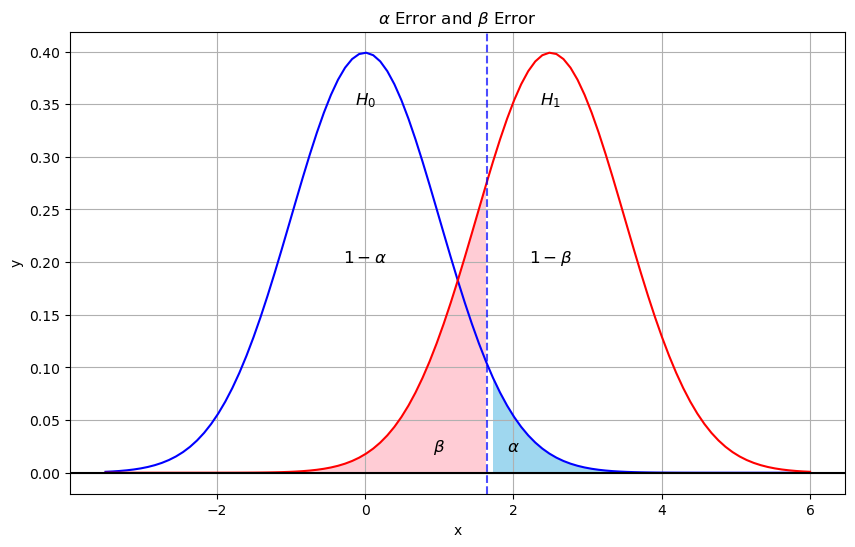

In [6]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

# plot 작성
x = np.linspace(-3.5, 6, 101)        # x 정의
y1 = stats.norm(0, 1).pdf(x)        
y2 = stats.norm(2.5, 1).pdf(x)  

alpha = 0.05                          # 유의수준

# 유의수준일 때의 x
criticalValue = stats.norm(0, 1).ppf(1 - alpha)

# plot 작성
plt.figure(figsize=(10, 6))          # 플롯 사이즈 지정

plt.plot(x, y1, color='blue')        # H0 선을 파랑색으로 지정하여 plot 작성
plt.plot(x, y2, color='red')         # H1 선을 빨강색으로 지정하여 plot 작성

plt.axhline(0, color='black')        # x축을 수평선으로 표시

# H0 유의수준에 파란색 점선으로 수직선 표시
plt.axvline(criticalValue, linestyle='--', color='blue', alpha=.7)

# 융의수준을 기준으로 하늘색과 핑크색으로 면적 칠하기
plt.fill_between(x, 0, y1, where=(x >= criticalValue), facecolor='skyblue', alpha=.8,)
plt.fill_between(x, 0, y2, where=(x <= criticalValue), facecolor='pink', alpha=.8,)

# 면적에 대하여 텍스트 표시
plt.text(0, .35, r'$H_0$', fontsize=12, horizontalalignment='center')
plt.text(2.5, .35, r'$H_1$', fontsize=12, horizontalalignment='center')
plt.text(2, .02, r'$\alpha$', fontsize=12, horizontalalignment='center')
plt.text(1, .02, r'$\beta$', fontsize=12, horizontalalignment='center')
plt.text(0, .2, r'$1-\alpha$', fontsize=12, horizontalalignment='center')
plt.text(2.5, .2, r'$1-\beta$', fontsize=12, horizontalalignment='center')

plt.xlabel("x")                      # x축 레이블 지정
plt.ylabel("y")                      # y축 레이블 지정
plt.grid()                           # 플롯에 격자 보이기
plt.title(r'$\alpha$ Error and $\beta$ Error')     # 타이틀 표시
plt.show()                           # 플롯 보이기

- 1종 오류 코드에서 유의수준을 0.05로 선정하여 작성하였고, 유의수준에 해당하는 임계값을 계산하여 파란색 점선으로 표시하고, 귀무가설을 나타내는 파란색 선 아래의 면적을 1-알파로 표시하였으며 이 영역이 1종 오류를 발생시킬 수 있는 영역이다.

- 2종 오류에서는 대립가설을 나타내는 빨간색 선 아래의 면적을 1-베타로 표시하였으며, 이 영역은 2종 오류를 발생시킬 수 있는 영역이다.

-----------------
- 플롯을 보면 유의수준(알파)인 파란색 영역과 2종 오류를 나타내는 빨간색 영역이 상호 보완적인 관계를 취하고 있는 것을 볼 수 있는데, 유유의수준을 높이면 1종 오류의 확률은 감소하지만 2종 오류의 확률은 증가하게되며, 유의수준을 낮추면 1종 오류의 확률은 증가하고 2종 오류의 확률은 감소하게되는 것이다.